# Visualización


La visualización es un recurso **útil y/o necesario** para el **análisis exploratorio** de los datos y la **presentación de resultados**. Veremos unas serie de gráficos que *resumen información estadística* de una base de datos determinada (muestra, población, etc.), tales como:

# <center>
<img src='http://www.statisticsviews.com/SpringboardWebApp/userfiles/stats/image/Ajay%20Ohri/Factorplot%20from%20Python%20tutorial.png'>


1. Histogramas 
2. Box plots (la imagen de arriba)
3. Violin plots
4. De dispersión (scatterplots)
5. De líneas (plots)
6. De barras (bar, barh)
7. Paneles combinados
8. Matrices de correlación

Los paneles combinados pueden incluir información sobre una misma variable o, bien, pueden mostrar la *relación entre dos (o más) variables* de una base de datos. En estos casos, recurrimos a los jointplots o los pairplots.

Recordemos que siempre tenemos que **importar las librerías** y **cargar los datos**.

Hay diversas librerías/bibliotecas para implementar visualizaciones y, entre ellas, muchas se basan en *matplotlib*. Aquí veremos las siguientes:
* Matplotlib
* Seaborn

## Retomando estadística descriptiva

### Histogramas
Los histogramas se utilizan para observar la función de densidad, es decir, la distribución de frecuencia de los valores de una variable de interés.

Documentación de Matplotlib: https://matplotlib.org/1.2.1/examples/pylab_examples/histogram_demo.html

In [1]:
# Importamos la funcionalidad necesaria
import numpy as np
import matplotlib.pyplot as plt

# Magic function
# %matplotlib inline  

# Vamos a generar una distribución normalmente distribuida
# Definimos los parámetros
media = 250
desvio = 50

# Generamos la distribución
x = np.random.normal(media, desvio, 10000)

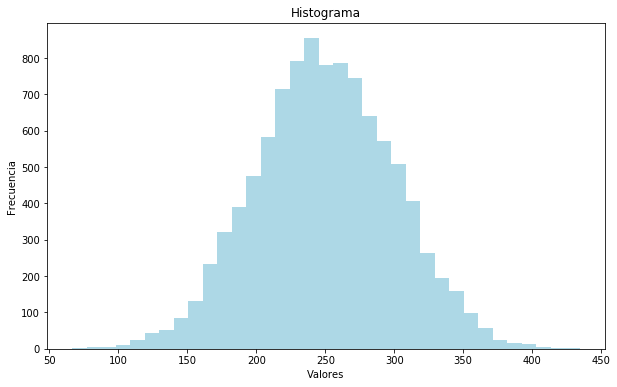

In [2]:
# Ploteamos el histograma
plt.figure(figsize=(10,6))

plt.hist(x, bins=35, color='lightblue')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma')
plt.show()

### Box plot

En este caso, trabajaremos con los box plots reparten la distribución en cuartiles, permitiendo identificar cuáles son los rangos de valores de cada uno.

#### Primero carguemos los datos con pandas

Nuestro dataset está almacenado en el archivo ```president_heights.csv```

In [3]:
# Importamos la funcionalidad necesaria
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('../Data/president_heights.csv')

In [4]:
# Veamos qué variables tiene la data
data.head()

,order,name,height(cm)
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183


In [5]:
# Obtengamos una descripción del dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
order         42 non-null int64
name          42 non-null object
height(cm)    42 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.1+ KB


#### Ahora veamos la documentación

Documentación de Seaborn: https://seaborn.pydata.org/generated/seaborn.boxplot.html

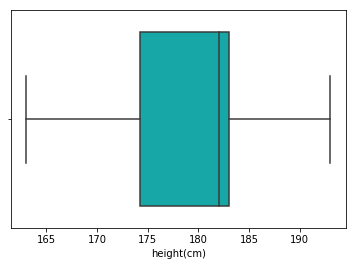

In [6]:
# Probemos qué pasa si introducimos el nombre de las variables tal como aparece
sns.boxplot(x='height(cm)', data=data, orient='h', color='c') 
plt.show()

In [7]:
np.sort(np.unique(np.array(data['height(cm)'])))

array([163, 168, 170, 171, 173, 174, 175, 177, 178, 179, 180, 182, 183,
       185, 188, 189, 193], dtype=int64)

In [8]:
print('Mediana de la altura de los presidentes: {}'.format(data['height(cm)'].median()))
print('Media de la altura de los presidentes: {0:.2f}'.format(data['height(cm)'].mean()))

Mediana de la altura de los presidentes: 182.0
Media de la altura de los presidentes: 179.74


### Violin plot

Como un sustituto de los histogramas, podemos emplear este tipo de visualización para identificar la forma de la distribución. A su vez, plotean la información intercuartílica contenida en los box plots.

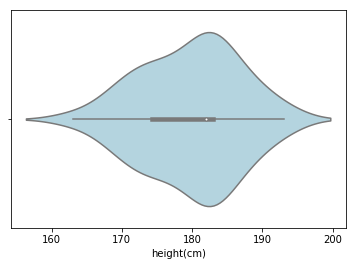

In [9]:
sns.violinplot('height(cm)', data=data, palette=["lightblue"]);
plt.show()

### Panel 1: Boxplot + histograma

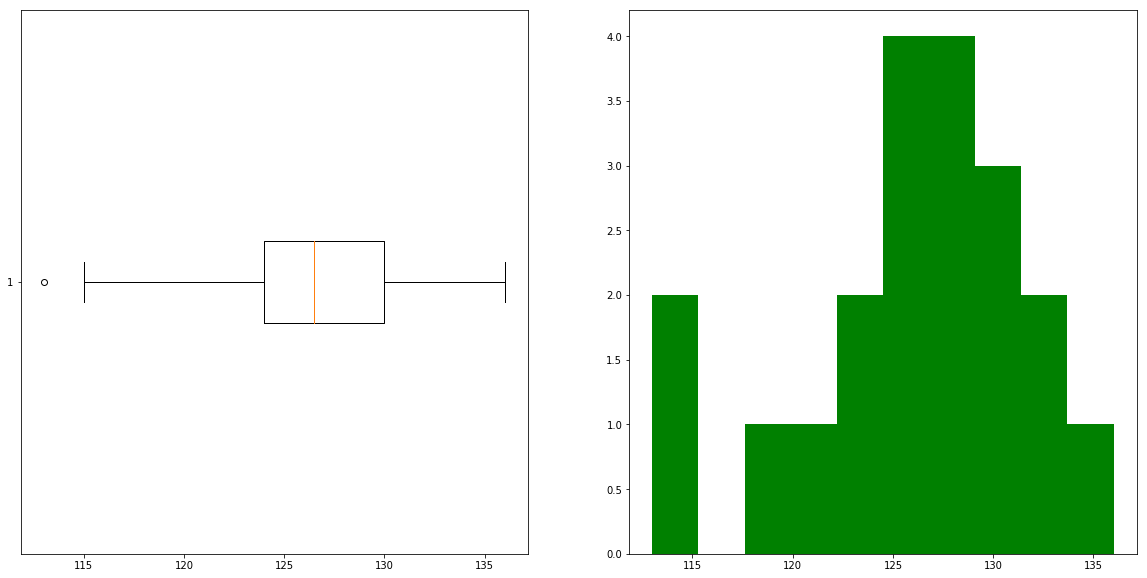

In [10]:
# Creamos un nuevo dataset
dataset = [113, 115, 119, 121, 124, 124, 125, 126, 126, 126, 127, 127, 128, 129, 130, 130, 131, 132, 133, 136]

# Características generales del próximo gráfico que vayamos a mostrar
plt.figure(figsize=(20,10))

# Forma de la grilla y posición del subplot
plt.subplot(121)
plt.boxplot(dataset, vert=False)

# Otro subplot
plt.subplot(122)
plt.hist(dataset, color='green')

# Mostramos el gráfico
plt.show()

### Panel 2: set de gráficos 

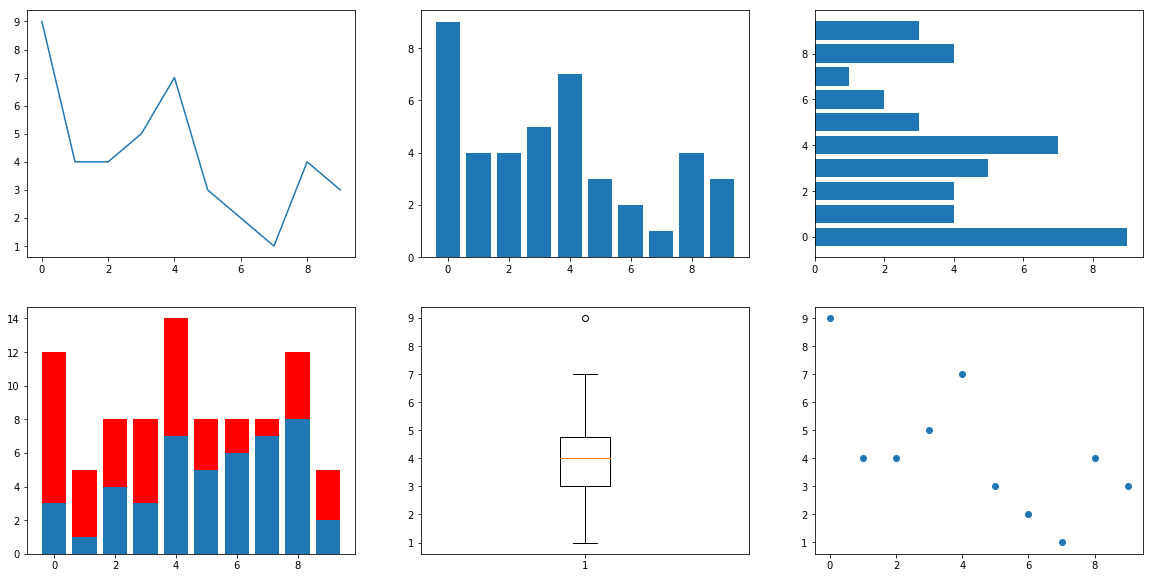

In [11]:
# Generamos x e y
x = [0,1,2,3,4,5,6,7,8,9]
y = [9,4,4,5,7,3,2,1,4,3]

# Generamos el entorno de la figura
plt.figure(figsize=(20, 10))

# Dividimos el área en áreas de 2 filas x 3 columnas (grids) (la forma de los grids es análoga a la de los arrays)
# para generar distintas vistas de los datos

# Bloque superior
plt.subplot(231) # seleccionamos el #1
plt.plot(x, y) # gráfico que muestra la relación lineal entre las variables

plt.subplot(232) # seleccionamos el #2
plt.bar(x, y) # gráfico de barras

plt.subplot(233) # seleccionamos el #3
plt.barh(x, y) # gráfico de barras horizontales

# Bloque inferior
plt.subplot(234) # seleccionamos el #4

# Necesitamos agregar una segunda variable para el ejemplo
y1 = [3, 1, 4, 3, 7, 5, 6, 7, 8, 2] 

# Ploteamos la primera parte del gráfico
plt.bar(x, y1) 
# Apilamos la segunda variable, tomando y1 como base
plt.bar(x, y, bottom=y1, color = 'red') 

plt.subplot(235) # seleccionamos el #5
plt.boxplot(y) 

plt.subplot(236) # seleccionamos el #6
plt.scatter(x, y)

plt.show()

## Scatter plots y coeficiente de correlación

Generamos nuevas variables con el propósito de graficarlas con un scatter plot y, luego, calcular tipos de asociación lineal.

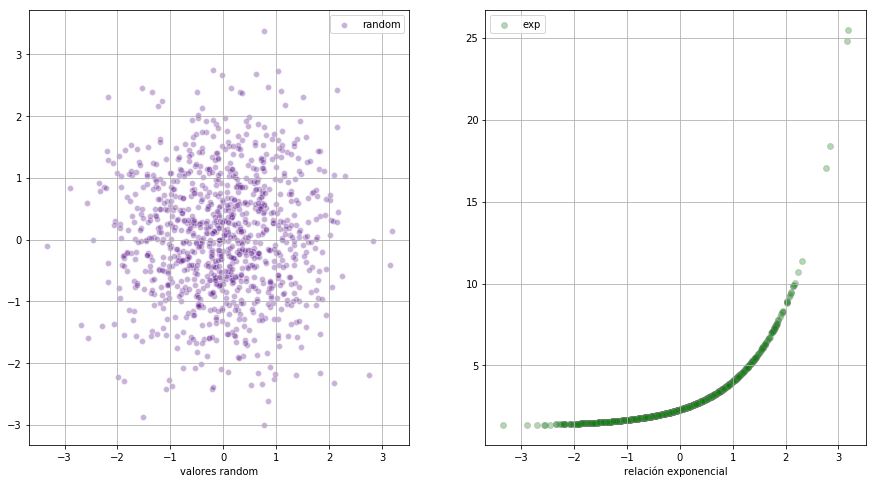

In [12]:
# Generamos los valores para w
w = np.random.randn(1000)

# Generamos valores random para z1
z1 = np.random.randn(len(w))

# Generamos valores para z2
z2 = 1.3 + np.exp(w)

# Definimos el tamaño de la figura
plt.figure(figsize=(15,8))

# Definimos la primera parte de nuestra figura
plt.subplot(121)
plt.scatter(w, z1, color='indigo', alpha=0.3, edgecolors='white', label='random')
plt.xlabel('valores random')
plt.grid(True)
plt.legend()

# Definimos la segunda parte de nuestra figura
plt.subplot(122)
plt.scatter(w, z2, color='green', alpha=0.3, edgecolors='grey', label='exp')
plt.xlabel('relación exponencial')
plt.grid(True)
plt.legend()

plt.show()

 * ¿Qué tipo de relación observás entre las variables del primer subplot? ¿Podés hablar de asociación o correlación lineal? 
 * ¿Y en el segundo subplot?
 * ¿Podés calcular la covarianza de estas variables? ¿Cómo interpretarías los coeficientes de correlación? ¿Qué nos dicen?

In [13]:
np.cov(w,z1)

array([[1.00555569, 0.00370944],
       [0.00370944, 0.97908879]])

In [14]:
np.cov(w,z2)

array([[1.00555569, 1.53745406],
       [1.53745406, 3.8691317 ]])

[[1.         0.00373847]
 [0.00373847 1.        ]]


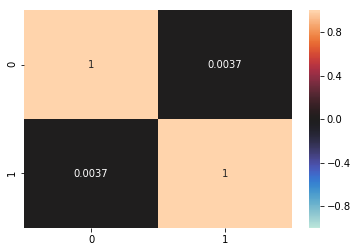

In [15]:
corr1 = np.corrcoef(w,z1)
print(corr1)

sns.heatmap(corr1, annot=True, vmin=-1, vmax=1, center=0);
plt.show()

[[1.        0.7794573]
 [0.7794573 1.       ]]


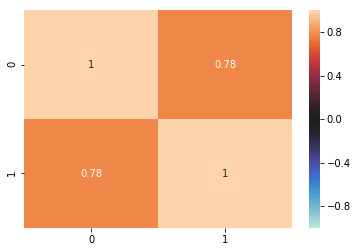

In [16]:
corr2 = np.corrcoef(w,z2)
print(corr2)

sns.heatmap(corr2, annot=True, vmin=-1, vmax=1, center=0);
plt.show()

[[ 1.         -0.00319017]
 [-0.00319017  1.        ]]


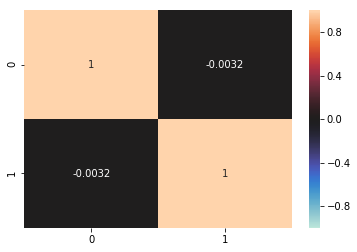

In [17]:
corr3 = np.corrcoef(z1,z2)
print(corr3)

sns.heatmap(corr3, annot=True, vmin=-1, vmax=1, center=0);
plt.show()

[[ 1.          0.00373847  0.7794573 ]
 [ 0.00373847  1.         -0.00319017]
 [ 0.7794573  -0.00319017  1.        ]]


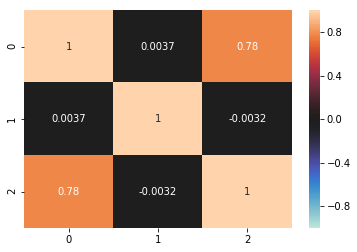

In [18]:
corr4 = np.corrcoef([w,z1,z2])
print(corr4)

sns.heatmap(corr4, annot=True, vmin=-1, vmax=1, center=0);
plt.show()